In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

bank = pd.read_csv('bank-additional-full.csv', sep=';')

# Описательный анализ

Первичный обзор данных

In [19]:
print("Форма (строки, столбцы):")
print(bank.shape)

print("\nПервые 5 строк данных:")
print(bank.head())

print("\nЦелевая функция:")
print(bank.y.value_counts(normalize=True))

Форма (строки, столбцы):
(41188, 21)

Первые 5 строк данных:
   age        job  marital    education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent           1.1          93.994          -36.4      4.857   
1   57   services  married  high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent           1.1          93.994          -36.4      4.857   
2   37   services  married  high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent           1.1          93.994          -36.4      4.857   
3   40     admin.  married     basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexisten

Распределение показателей

In [20]:
print("\Распределение показателей:")
print(bank.describe())

\Распределение показателей:
               age      duration      campaign         pdays      previous  emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593    962.475454      0.172963      0.081886       93.575664     -40.502600      3.621291   5167.035911
std       10.42125    259.279249      2.770014    186.910907      0.494901      1.570960        0.578840       4.628198      1.734447     72.251528
min       17.00000      0.000000      1.000000      0.000000      0.000000     -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       32.00000    102.000000      1.000000    999.000000      0.000000     -1.800000       93.075000     -42.700000      1.344000   5099.100000
50%       38.00000    180.000000      2.000000    999.000000      0.000000      1.10

Пропуски и типы

In [21]:
print("\Информация о данных:")
print(bank.info())
print("\nПропущенные значения:")
print(bank.isna().sum())

\Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

Дубликаты

In [22]:
dup_cnt = bank.duplicated().sum()
print("Дубликатов строк:", dup_cnt)
print(bank[bank.duplicated()].head(10))

Дубликатов строк: 12
       age          job   marital            education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
1266    39  blue-collar   married             basic.6y       no      no   no  telephone   may         thu       124         1    999         0  nonexistent           1.1          93.994   
12261   36      retired   married              unknown       no      no   no  telephone   jul         thu        88         1    999         0  nonexistent           1.4          93.918   
14234   27   technician    single  professional.course       no      no   no   cellular   jul         mon       331         2    999         0  nonexistent           1.4          93.918   
16956   47   technician  divorced          high.school       no     yes   no   cellular   jul         thu        43         3    999         0  nonexistent           1.4          93.918   
18465   32   technician    single 

# Визуализация

Распределение целевого признака

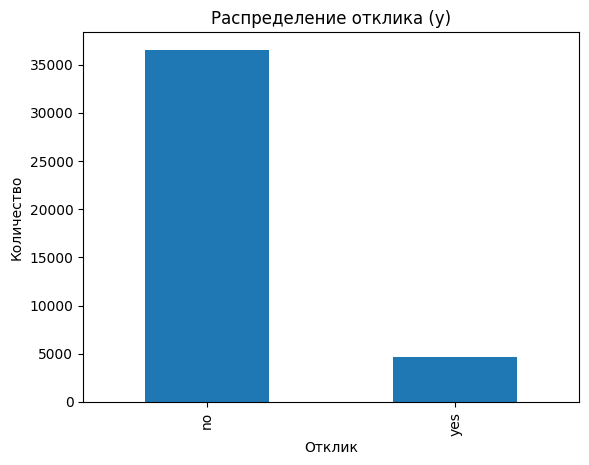

In [23]:
ax = bank['y'].value_counts().plot(kind='bar')
ax.set_title('Распределение отклика (y)')
ax.set_xlabel('Отклик')
ax.set_ylabel('Количество')
plt.show()

Числовые признаки

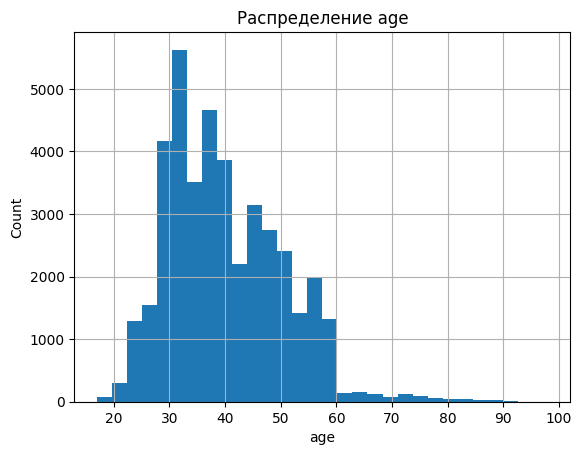

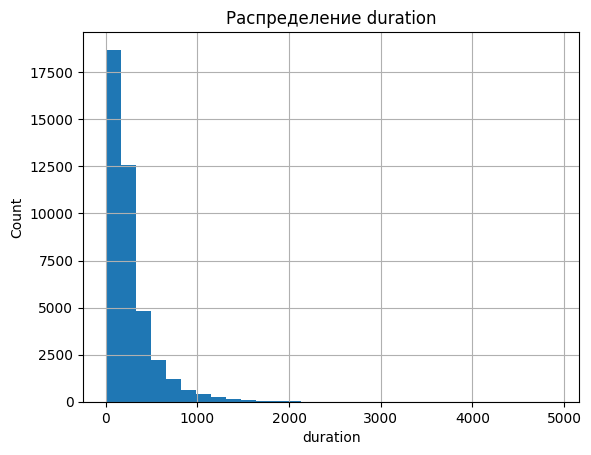

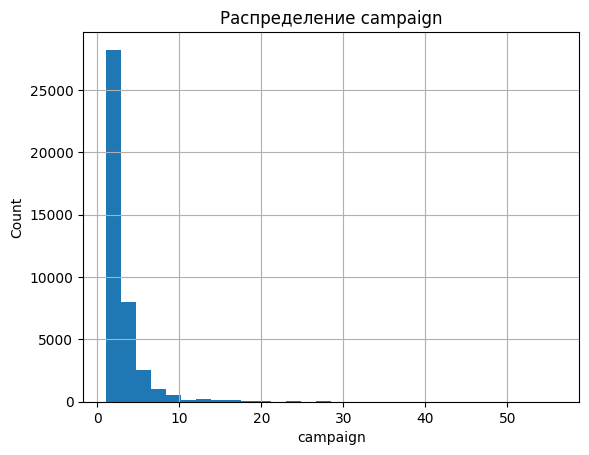

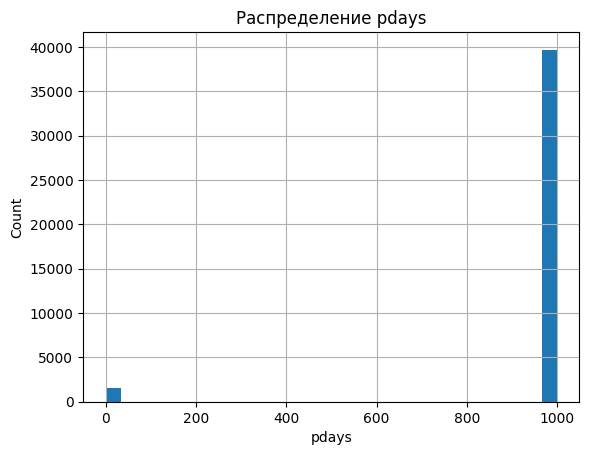

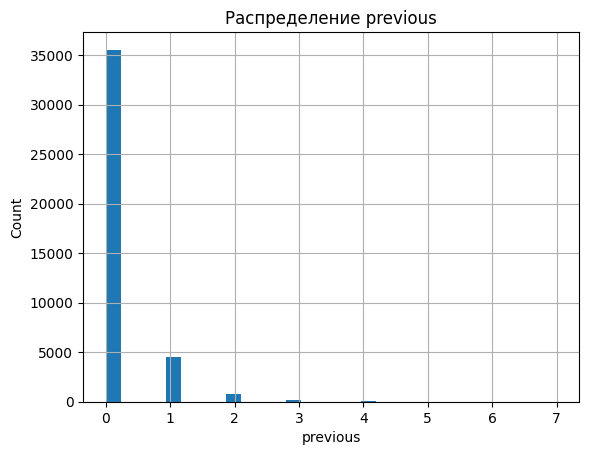

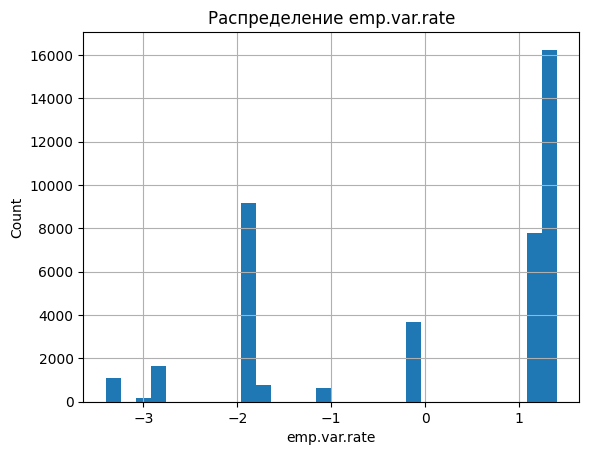

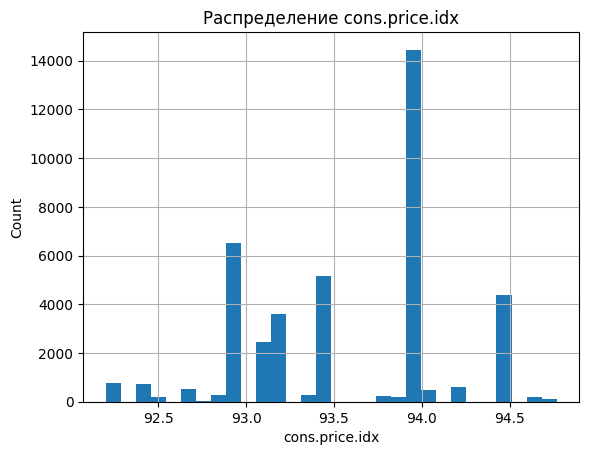

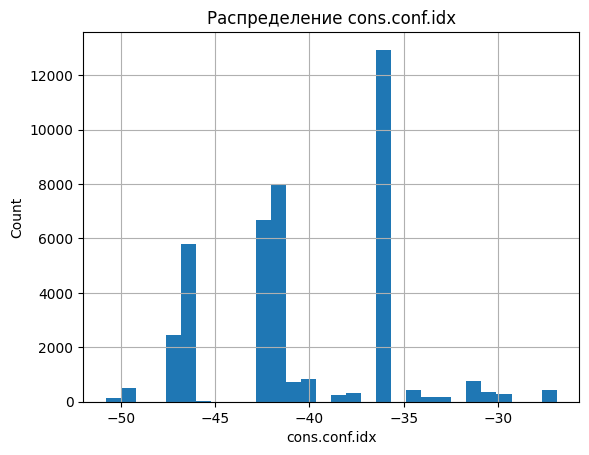

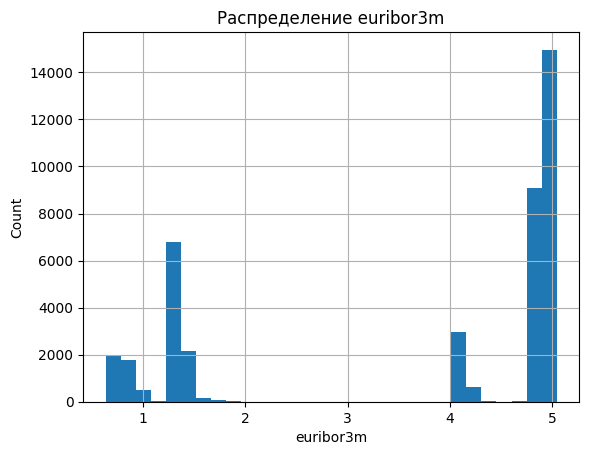

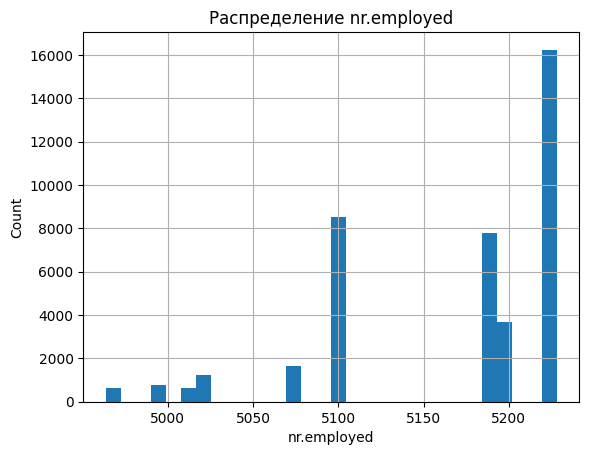

In [24]:
num_cols = bank.select_dtypes(include='number').columns.tolist()

for c in num_cols:
    bank[c].hist(bins=30)
    plt.title(f'Распределение {c}')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

Распределение "y" внутри категориальных групп в долях

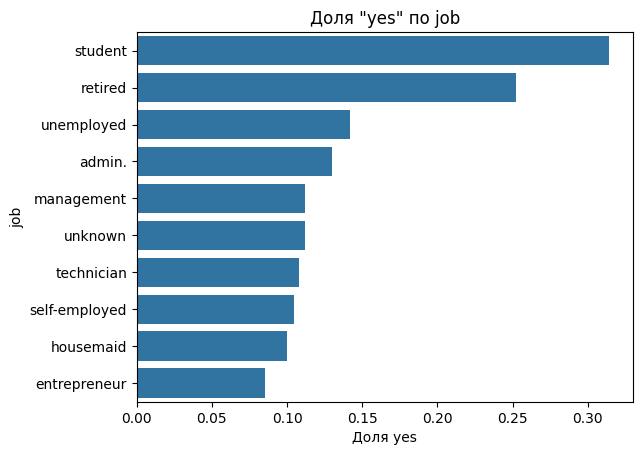

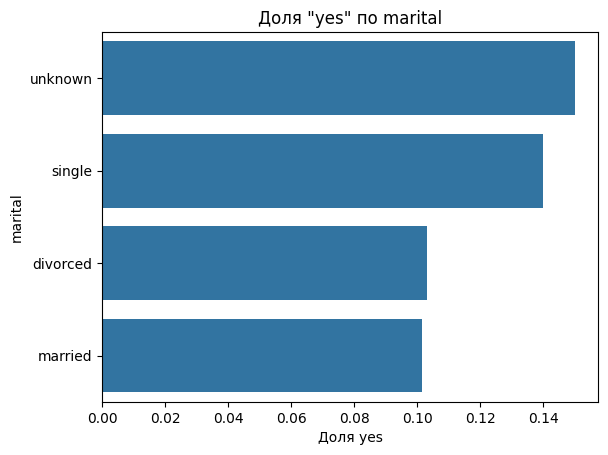

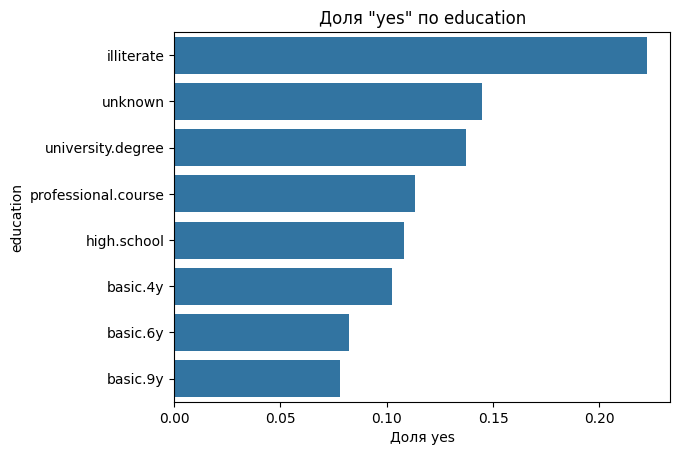

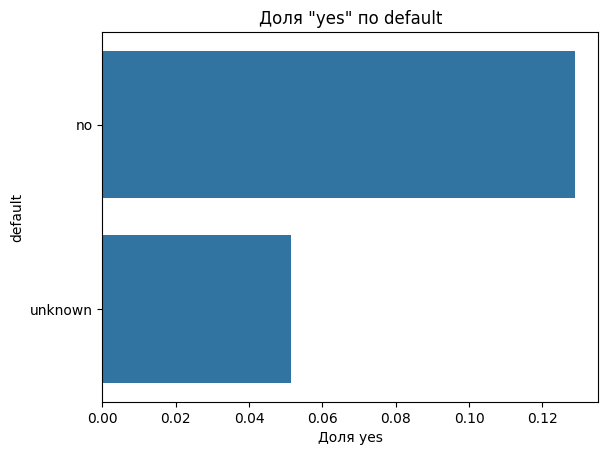

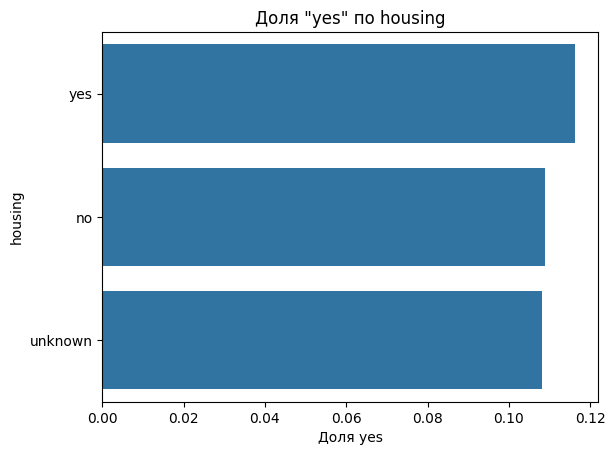

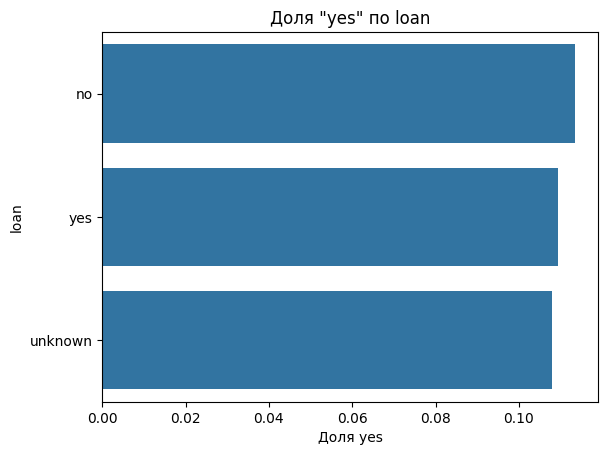

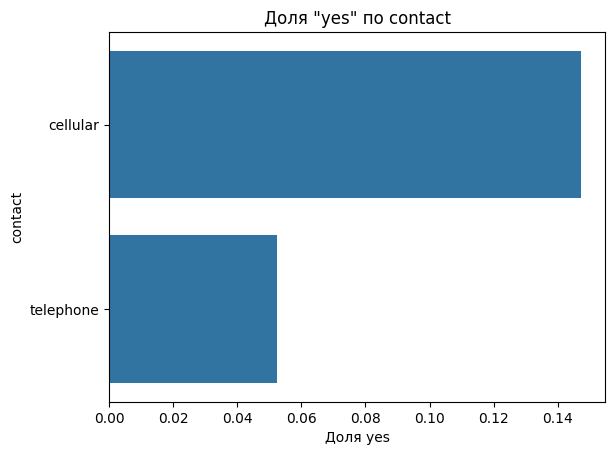

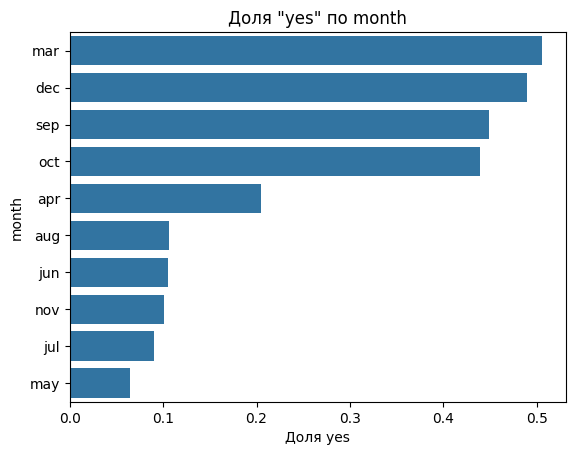

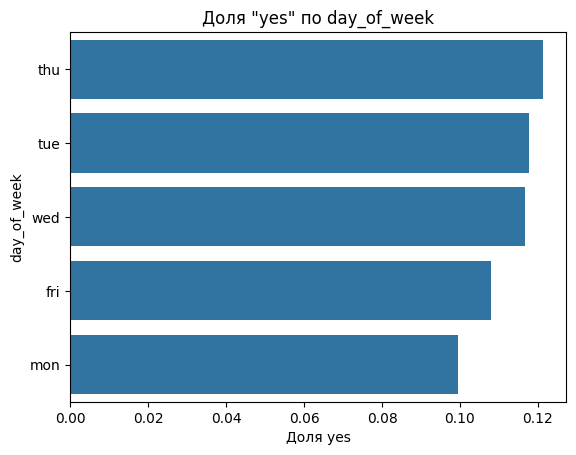

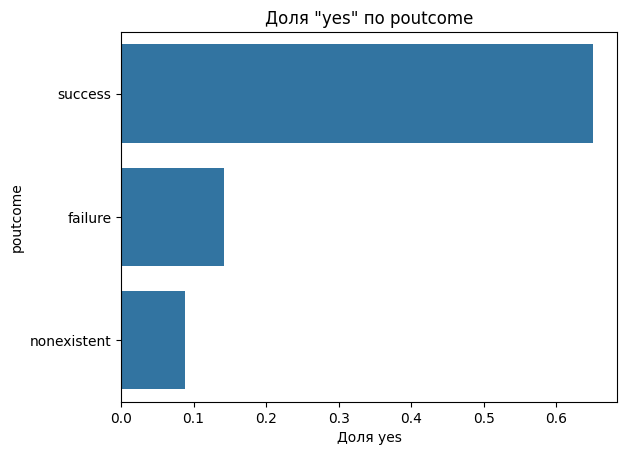

In [25]:
cat_cols = bank.select_dtypes(include=['object']).columns.tolist()

def plot_cat_and_target(col, n=10):
    tab = (bank.groupby(col)['y'].value_counts(normalize=True)
             .rename('share').reset_index())
    tab_yes = tab[tab['y']=='yes'].sort_values('share', ascending=False).head(n)
    sns.barplot(data=tab_yes, x='share', y=col)
    plt.title(f'Доля "yes" по {col}')
    plt.xlabel('Доля yes')
    plt.ylabel(col)
    plt.show()

for c in cat_cols:
      if c == 'y':
        continue
      plot_cat_and_target(c)

# Корреляции с целевым показателем

In [26]:
encoded_data = pd.get_dummies(bank, drop_first=True)
corr = encoded_data.corr(numeric_only=True)['y_yes'].sort_values(ascending=False)

print('Корреляции с целевым показателем "y"')
corr

Корреляции с целевым показателем "y"


,y_yes
y_yes,1.000000
duration,0.405274
poutcome_success,0.316269
previous,0.230181
month_mar,0.144014
month_oct,0.137366
month_sep,0.126067
job_student,0.093955
job_retired,0.092221
month_dec,0.079303


# Сегментация по признакам

In [27]:
def segment_summary(cols):

    grp = bank.groupby(cols)['y'].apply(lambda s: (s=='yes').mean()).reset_index(name='conv_rate')
    return grp.sort_values('conv_rate', ascending=False)

cols = ['job', 'education', 'contact', 'month', 'poutcome']

for c in cols:
    n = 12 if c == 'month' else 10
    print(f"\nТоп - {n} {c}  по конверсии ")
    print(segment_summary([c]).head(n))


Топ - 10 job  по конверсии 
              job  conv_rate
8         student   0.314286
5         retired   0.252326
10     unemployed   0.142012
0          admin.   0.129726
4      management   0.112175
11        unknown   0.112121
9      technician   0.108260
6   self-employed   0.104856
3       housemaid   0.100000
2    entrepreneur   0.085165

Топ - 10 education  по конверсии 
             education  conv_rate
4           illiterate   0.222222
7              unknown   0.145003
6    university.degree   0.137245
5  professional.course   0.113485
3          high.school   0.108355
0             basic.4y   0.102490
1             basic.6y   0.082024
2             basic.9y   0.078246

Топ - 10 contact  по конверсии 
     contact  conv_rate
0   cellular   0.147376
1  telephone   0.052313

Топ - 12 month  по конверсии 
  month  conv_rate
5   mar   0.505495
2   dec   0.489011
9   sep   0.449123
8   oct   0.438719
0   apr   0.204787
1   aug   0.106021
4   jun   0.105115
7   nov   0.101439
3   

# Выводы

In [33]:
# Общая конверсия
overall = (bank['y']=='yes').mean()
print(f"Общая конверсия: {overall:.2%}.")

# Топ-5 признаков по корреляции (из OHE)
top5 = corr.abs().drop('y_yes', errors='ignore').head(5)
print(f"Топ-5 признаков по |corr| с откликом: {', '.join([f'{k} ({v:.3f})' for k, v in top5.items()])}")

# Пара примеров сегментов
for col in ['job','education','contact','month','poutcome']:
    seg = segment_summary([col]).head(3)
    txt = "; ".join([f"{r[col]} = {r['conv_rate']:.2%}" for _,r in seg.iterrows()])
    print(f"Лучшие сегменты по {col}: {txt}")

Общая конверсия: 11.27%.
Топ-5 признаков по |corr| с откликом: duration (0.405), poutcome_success (0.316), previous (0.230), month_mar (0.144), month_oct (0.137)
Лучшие сегменты по job: student = 31.43%; retired = 25.23%; unemployed = 14.20%
Лучшие сегменты по education: illiterate = 22.22%; unknown = 14.50%; university.degree = 13.72%
Лучшие сегменты по contact: cellular = 14.74%; telephone = 5.23%
Лучшие сегменты по month: mar = 50.55%; dec = 48.90%; sep = 44.91%
Лучшие сегменты по poutcome: success = 65.11%; failure = 14.23%; nonexistent = 8.83%
